# Median ROI by Genre (Barplot)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
imdb = pd.read_csv('imdb_movies.csv')
yt = pd.read_csv('movies_youtube_sentiments.csv')

In [3]:
imdb['revenue'] = imdb['revenue'].astype(int)
yt['gross'] = yt['gross'].astype(int)

imdb.rename(columns={'names': 'name'}, inplace = True)
merged_movies = pd.concat([imdb, yt], ignore_index=True)
pd.set_option('display.max_columns', None)
merged_movies.head(1)
unique_movies = merged_movies.drop_duplicates(subset = 'name')

# Replace non-breaking spaces with regular spaces
unique_movies['genre'] = unique_movies['genre'].str.replace('\xa0', ' ', regex=True)

# Now perform the split operation
unique_movies['genre'] = unique_movies['genre'].str.split(', ')

# Use explode to create individual rows for each genre
unique_movies_exploded = unique_movies.explode('genre')

unique_movies_exploded['revenue'] = unique_movies_exploded['revenue'].fillna(0)
unique_movies_exploded['revenue'] = unique_movies_exploded['revenue'].astype(int)
unique_movies_exploded['gross'] = unique_movies_exploded['gross'].fillna(0).astype(int)

unique_movies_exploded.reset_index(drop=True, inplace=True)
unique_movies_exploded.loc[unique_movies_exploded['revenue'] == 0, 'revenue'] = unique_movies_exploded.loc[unique_movies_exploded['revenue'] == 0, 'gross']
unique_movies_exploded = unique_movies_exploded.drop('gross', axis = 1)

genre_avg_box_office = unique_movies_exploded.groupby('genre')['revenue'].mean()

genre_avg_box_office_sorted = genre_avg_box_office.sort_values(ascending=False)
genre_avg_box_office_sorted = genre_avg_box_office_sorted.drop('TV Movie')

genre_avg_box_office_df = unique_movies_exploded[['revenue', 'genre']]
genre_avg_box_office_df_filter = genre_avg_box_office_df[genre_avg_box_office_df['genre'] != 'TV Movie']

genre_revenue = genre_avg_box_office_df_filter.groupby('genre')['revenue'].mean().sort_values(ascending = False)
top_10_genres = genre_revenue.head(10).index.tolist()

top_10_genres_moneywise = genre_avg_box_office_df_filter[genre_avg_box_office_df_filter['genre'].isin(top_10_genres)]
top_10_genres_moneywise['genre'] = pd.Categorical(top_10_genres_moneywise['genre'], categories=top_10_genres, ordered=True)

In [4]:
unique_movies_exploded['budget_x'] = unique_movies_exploded['budget_x'].fillna(0)
unique_movies_exploded['budget_x'] = unique_movies_exploded['budget_x'].astype(int)
unique_movies_exploded['budget'] = unique_movies_exploded['budget'].fillna(0).astype(int)

unique_movies_exploded.reset_index(drop=True, inplace=True)
unique_movies_exploded.loc[unique_movies_exploded['budget_x'] == 0, 'budget_x'] = unique_movies_exploded.loc[unique_movies_exploded['budget_x'] == 0, 'budget']
unique_movies_exploded = unique_movies_exploded.drop('budget', axis = 1)
unique_movies_dropped_bad_budgets = unique_movies_exploded[unique_movies_exploded['budget_x'] != 0]
unique_movies_dropped_bad_budgets_top10 = unique_movies_dropped_bad_budgets[unique_movies_dropped_bad_budgets['genre'].isin(top_10_genres)]
unique_movies_dropped_bad_budgets_top10['genre'] = pd.Categorical(unique_movies_dropped_bad_budgets_top10['genre'],
                                                            categories=top_10_genres, ordered=True)

UMDBBT10 = unique_movies_dropped_bad_budgets_top10

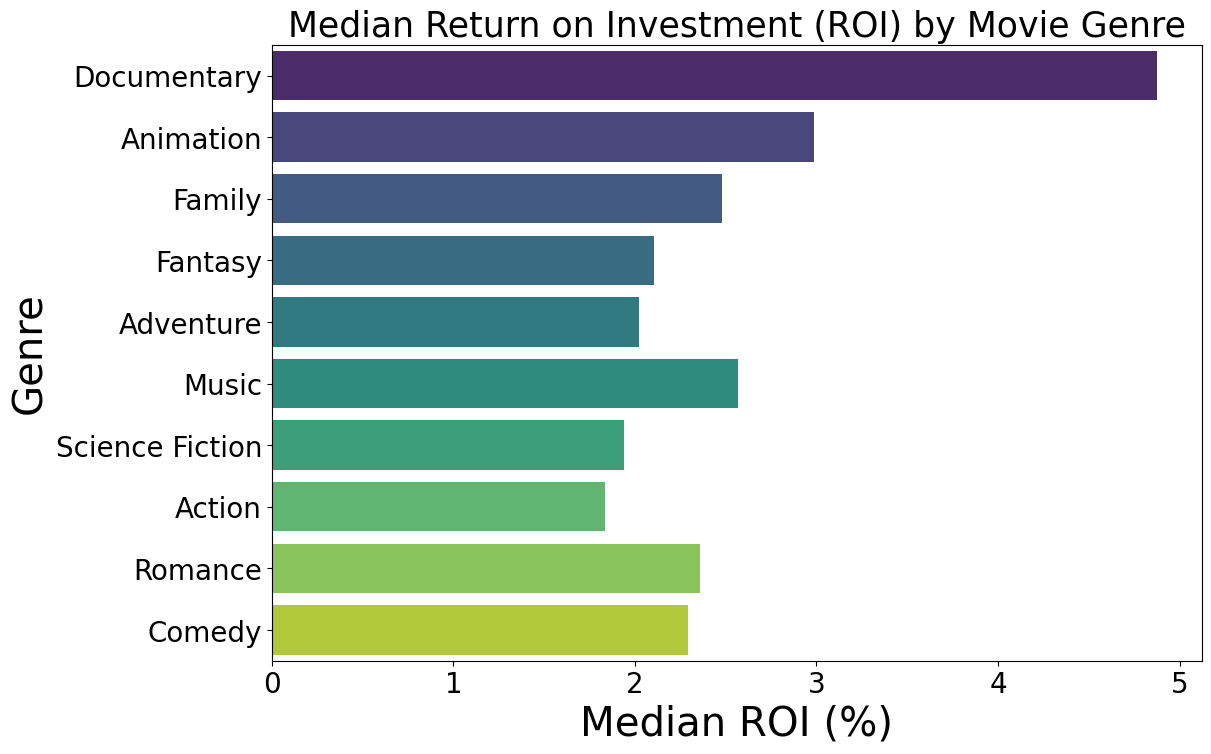

In [5]:
UMDBBT10['ROI'] = ((UMDBBT10['revenue'] - UMDBBT10['budget_x']) / UMDBBT10['budget_x'])
roi_median_by_genre = UMDBBT10.groupby('genre')['ROI'].median().reset_index()
roi_mean_by_genre = UMDBBT10.groupby('genre')['ROI'].mean().reset_index()
roi_by_genre = UMDBBT10.groupby('genre')['ROI'].agg(['median', 'mean']).reset_index()

plt.figure(figsize = (12,8))
sns.barplot(data = roi_median_by_genre, x = 'ROI', y = 'genre', palette = 'viridis', orient = 'h') 
plt.title('Median Return on Investment (ROI) by Movie Genre', fontsize = 25)
plt.ylabel('Genre', fontsize = 29)
plt.xlabel('Median ROI (%)', fontsize = 29)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()